# Exploratory Data Analysis on Haberman Dataset

### Dataset description : The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


#### About Dataset :


##### 1. Number of Instances: 306


##### 2. Number of Attributes: 4 (including the class attribute)


##### 3. Attribute Information:
###### a. Age of patient at time of operation (numerical)
###### b. Patient's year of operation (year - 1900, numerical)
###### c. Number of positive axillary nodes detected (numerical)
###### d. Survival status (class attribute) : 1 = the patient survived 5 years or longer ; 2 = the patient died within 5 year


##### 4. Missing Attribute Values: None



###### Dataset link- https://www.kaggle.com/gilsousa/habermans-survival-data-set

### Objective :To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

In [10]:
#Importing packages
import warnings 
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Loading Haberman dataset
Haberman=pd.read_csv('C:/Users/Deepak/Documents/Applied AI assignments/1.EDA on Haberman dataset/haberman.csv')

In [3]:
Haberman.head(4)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1


In [4]:
#Renaming columns based o reference given in kaggle
Haberman.rename(columns={'30': 'age', '64': 'op_year','1':'axil_nodes','1.1':'surv_status'}, inplace=True)

In [5]:
Haberman.head(4)

,age,op_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1


In [6]:
#How many dataset and Features?
print(Haberman.shape)

(305, 4)


In [7]:
#Column names in our dataset
print(Haberman.columns)

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [8]:
#Distribution of data points in target variable: Surv_status
#Balanced v/s Imabalanced dataset?
print("Target variable distribution")
Haberman["surv_status"].value_counts()

Target variable distribution


1    224
2     81
Name: surv_status, dtype: int64

Total Datapoints:  306 (100%)
Patients Survived: 225 (73.53%)
Patients Died:     81  (26.47%)

This clearly indicates that our dataset is Imabalanced.

In [10]:
#Brief statistical summary of the dataset
Haberman.describe()

,age,op_year,axil_nodes,surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Checking Distribution of each variable

52    14
54    13
50    12
43    11
47    11
53    11
57    11
55    10
38    10
49    10
65    10
41    10
42     9
61     9
45     9
63     8
59     8
44     7
62     7
58     7
70     7
56     7
46     7
48     7
34     7
67     6
51     6
37     6
39     6
60     6
66     5
64     5
72     4
69     4
40     3
36     2
35     2
33     2
31     2
30     2
68     2
73     2
74     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

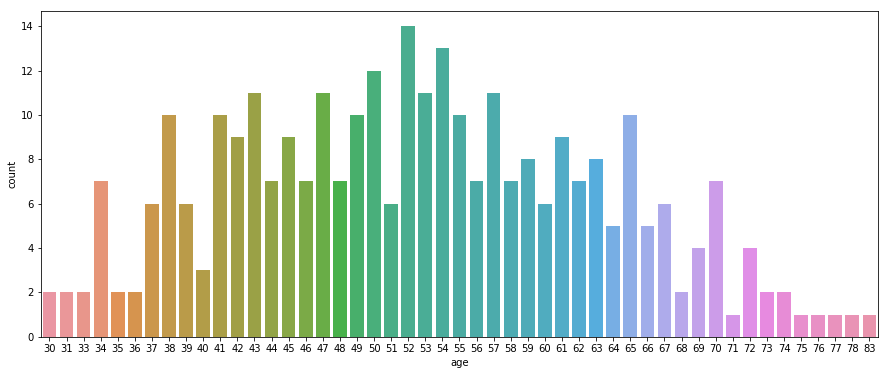

In [29]:
#Age

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = Haberman)

Haberman["age"].value_counts()


Distribution of AGE lies between 30 to 83

Highest populated age: 52 (5%)

Lowest populated age: 71,75,76,77,78,83 (0.33% Each)

58    36
64    30
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: op_year, dtype: int64

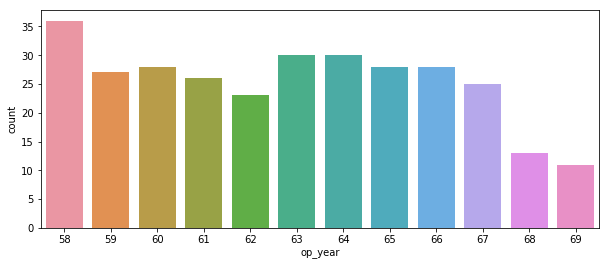

In [32]:
#Operation_year

plt.figure(figsize=(10,4))
sns.countplot(x='op_year',data = Haberman)

Haberman["op_year"].value_counts()

Distribution of Operation_year lies between 58 to 69

Highest populated year: 58 (12%)

Lowest populated year: 68, 69 (4% Each)

0     136
1      40
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: axil_nodes, dtype: int64

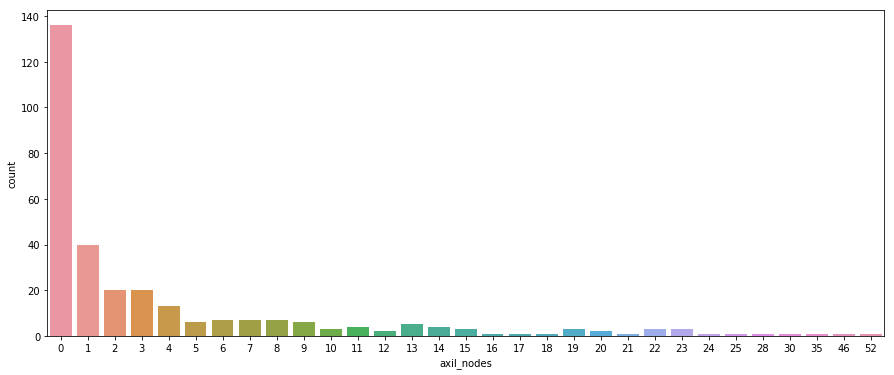

In [34]:
#Axil_nodes

plt.figure(figsize=(15,6))
sns.countplot(x='axil_nodes',data = Haberman)

Haberman["axil_nodes"].value_counts()

Distribution of Axil_nodes lies between 0 to 52 but it is highly skewed towards the less positive nodes i.e

Axillary Nodes from 0 to 9 accounts for 86% of the data.

1    224
2     81
Name: surv_status, dtype: int64

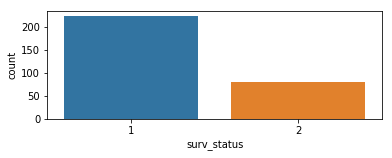

In [35]:
#Surv_status

plt.figure(figsize=(6,2))
sns.countplot(x='surv_status',data = Haberman)

Haberman["surv_status"].value_counts()

As we have seen before the dataset we have is Imbalanced.

Total Datapoints:  306 (100%)

Patients Survived: 225 (73.53%)

Patients Died:     81  (26.47%)


## Bivariate-Anlaysis (pdf, cdf, box-plot & violin plot)

#### Relationship b/w Surv_status & Age

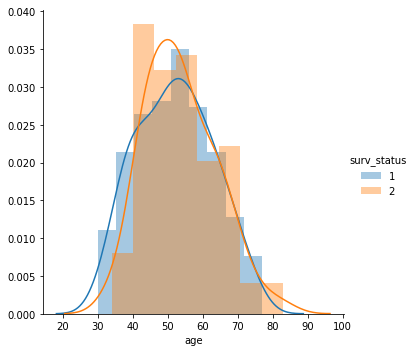

No handles with labels found to put in legend.


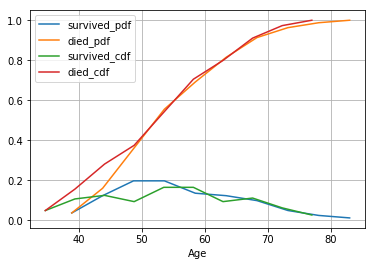

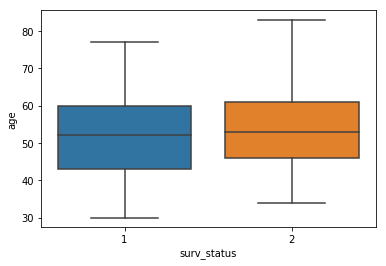

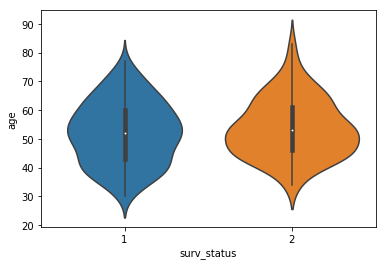

In [12]:
#PDF
sns.FacetGrid(Haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

#CDF
#Dividing dataset on the basis of survival to plot dataset separately
survived = Haberman.loc[Haberman["surv_status"] == 1]
died = Haberman.loc[Haberman["surv_status"] == 2]

counts,bin_edges = np.histogram(died['age'],bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend()

counts,bin_edges = np.histogram(survived['age'],bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['survived_pdf','died_pdf','survived_cdf','died_cdf'])
plt.xlabel('Age')
plt.grid()
plt.show()

#Box-plot
sns.boxplot(x='surv_status',y='age', data=Haberman)
plt.show()

#Violin Plot
sns.violinplot(x="surv_status", y="age", data=Haberman, size=8)
plt.show()


Remarks:

Histogram: We can see the peak of survived patients gaining lift over the patients who died for the age band less than 40 years old and after crossing the 40 age mark
surviving peak is getting suppress as compare to those who didn't survive.

PDF and CDF : The distribution of both (survived and died) is similar till the 40 age mark after that we can see sudden rise in case of patients who died which is increasing in correaltion with the age.

Box plot: For age band 45-55 there is very strong overlapping but for age < 45 we can see pretty good distinction for patients who survived and age > 60 we can see good distinction for patients who died.

Violin plot: Similarly like box plot, for age band 45-55 there is very strong overlapping but for age < 45 we can see pretty good distinction for patients who survived and age > 60 we can see good distinction for patients who died.


#### Relationship b/w Surv_status & Operation_year

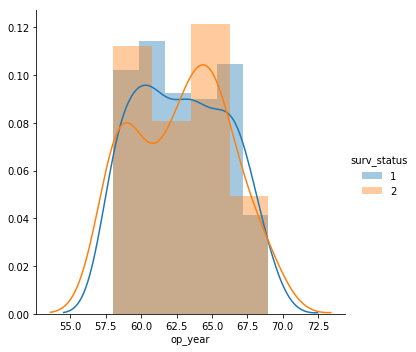

No handles with labels found to put in legend.


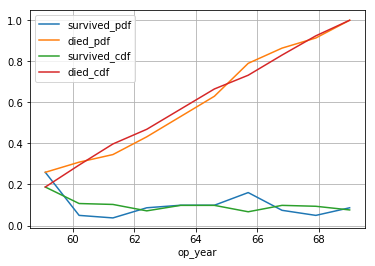

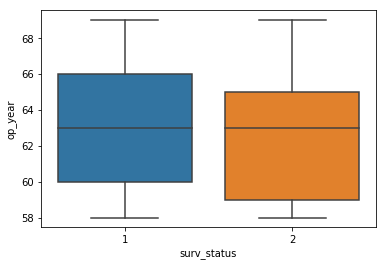

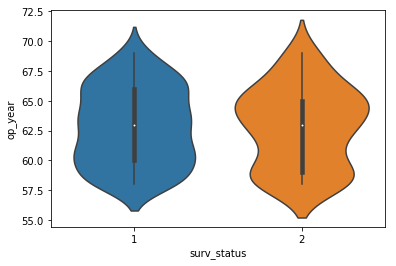

In [13]:
#PDF
sns.FacetGrid(Haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.show();

#CDF
#Dividing dataset on the basis of survival to plot dataset separately
survived = Haberman.loc[Haberman["surv_status"] == 1]
died = Haberman.loc[Haberman["surv_status"] == 2]

counts,bin_edges = np.histogram(died['op_year'],bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend()

counts,bin_edges = np.histogram(survived['op_year'],bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['survived_pdf','died_pdf','survived_cdf','died_cdf'])
plt.xlabel('op_year')
plt.grid()
plt.show()

#Box-plot
sns.boxplot(x='surv_status',y='op_year', data=Haberman)
plt.show()

#Violin Plot
sns.violinplot(x="surv_status", y="op_year", data=Haberman, size=8)
plt.show()


Remarks:

Histogram: Survived and died pateints share very similar distribution throughout except for year 1958-1963 where survival rate is much more & for year 1964-1968 where died percentage is much more.

PDF and CDF: We can see for close to early 50's the ratio of patients survived is high as so as operation year progress the distribution of patients survived starts getting supressed with sudden increase in the percentage of pateints died. 

Box plot: Box plot is showing bit counter intutive insights as compare to pdf and histogram where survival status is more post 1965 and died status is more pre 1960.

Violin plot: Similarto box plot survival status is more post 1965 and died status is more pre 1960.

Overall looking only at operation year we don't have a very clear picture of patients survival status.


#### Relationship b/w Surv_status & Axil_nodes

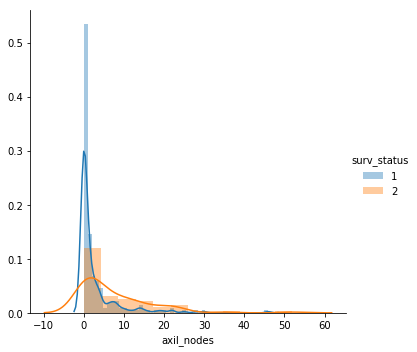

No handles with labels found to put in legend.


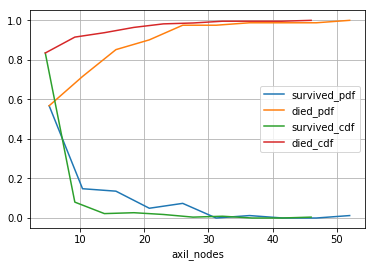

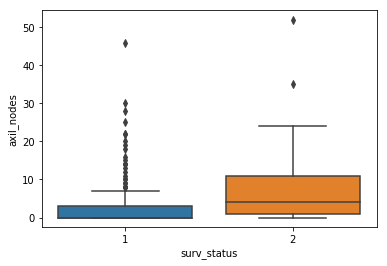

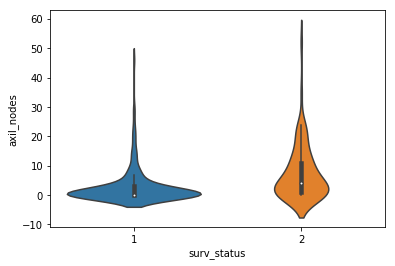

In [14]:
#PDF
sns.FacetGrid(Haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

#CDF
#Dividing dataset on the basis of survival to plot dataset separately
survived = Haberman.loc[Haberman["surv_status"] == 1]
died = Haberman.loc[Haberman["surv_status"] == 2]

counts,bin_edges = np.histogram(died['axil_nodes'],bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend()

counts,bin_edges = np.histogram(survived['axil_nodes'],bins = 10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['survived_pdf','died_pdf','survived_cdf','died_cdf'])
plt.xlabel('axil_nodes')
plt.grid()
plt.show()

#Box-plot
sns.boxplot(x='surv_status',y='axil_nodes', data=Haberman)
plt.show()

#Violin Plot
sns.violinplot(x="surv_status", y="axil_nodes", data=Haberman, size=8)
plt.show()


Remarks:

Histogram: The distribution is extremely left skewed with very clear distinction for patients who survived and died.
Less Axilary nodes (preferably 0) shows very high chance of pateints survival. Increase in detection of nodes lead to decrease in chance of patients survived.

PDF and CDF: Very high starting distribution for survived patients where we have 0 auxilary nodes. As nodes increase distribution for pateints died take over the survived distribution.

Box plot: Very distinctive plot as we can clearly see the difference b/w diesd and survived patients.
For 0 axil nodes our pateints surtvived and as nodes increase died ratio increase.

Violin plot: For 0 axil nodes survival status is much higher and as nodes increase chances of pateints died increase proportionately.

So far axil nodes have the most distinctive impact wh coms to predicting the patients survival.

## Multi-Variate Analysis (2D scatter-plot & joint plot)

#### Relationship b/w Surv_status & (Age,Operation_year)

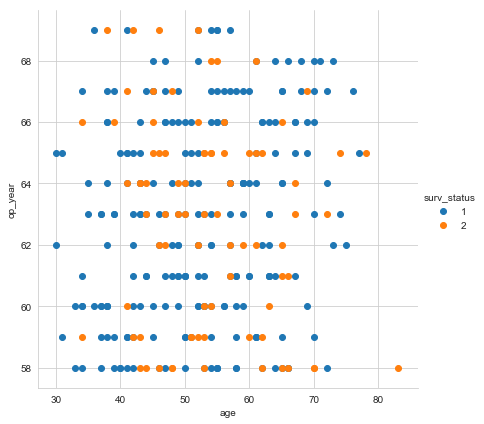

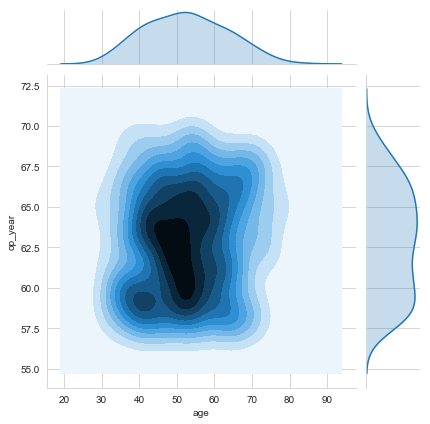

In [15]:
#2D scatter plot
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="surv_status", size=6) \
   .map(plt.scatter, "age", "op_year") \
   .add_legend();
plt.show();



#Joint plot
sns.jointplot(x= 'age',kind = 'kde', y='op_year', data = Haberman)
plt.show()

Remarks:

Scatter plot: Th plot is not very clea to identify the distribution of died and survived pateints.
    
Joint plot: When we look at age and operation year together than the best survival rate is depicted by the age group b/w 40 to 60 years irrespective of operation year(doesn't make much segregating difference)

#### Relationship b/w Surv_status & (Age,Axil_nodes)

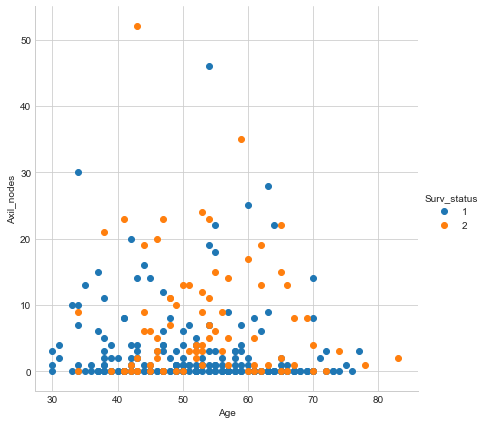

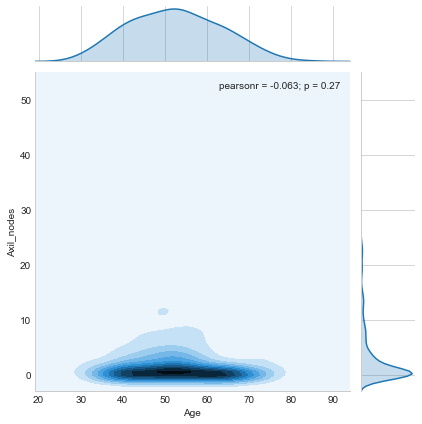

In [42]:
#2D scatter plot
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="Surv_status", size=6) \
   .map(plt.scatter, "Age", "Axil_nodes") \
   .add_legend();
plt.show();

#Joint plot
sns.jointplot(x= 'Age',kind = 'kde', y='Axil_nodes', data = Haberman)
plt.show()

Remarks:

Scatter plot: Here we can see mojority of the blue nodes are towards the bottom axis as y-axis is represented by axil nodes which conveys that with 0 axil nodes irrespective of age chances of survival is very high. 

Joint plot: Similar to scatter plot we can see the most dense distribution around 0 axil nodes where age really doesn't turn out to be distinctive attribute.

Irrespective of age if axil nodes are 0 or <5 than chances of survival are much high.

#### Relationship b/w Surv_status & (Axil_nodes,Operation_year)

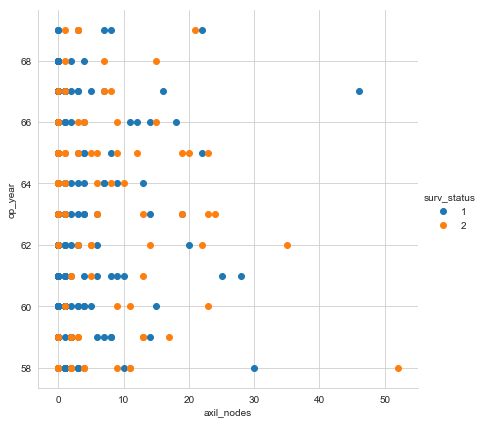

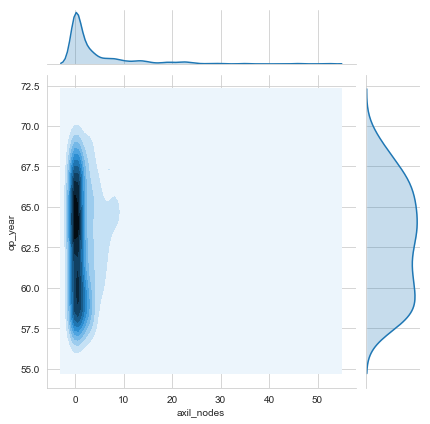

In [16]:
#2D scatter plot
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="surv_status", size=6) \
   .map(plt.scatter, "axil_nodes", "op_year") \
   .add_legend();
plt.show();

#Joint plot
sns.jointplot(x= 'axil_nodes',kind = 'kde', y='op_year', data = Haberman)
plt.show()

Remarks:

Scatter plot: Irrespectve of operation year,survived pateints are distributed towards 0 axil nodes.  

Joint plot: Again as we could see in case of axil_nodes v/s age, Axil_nodes is so strongly correlated with surv_status that irrepective of other features if axil nodes are not present than patients have survived.

## Multi-Variate Analysis (pair-plot, 3d-scatter plot, parallel-coordinates & co-relation matrix)

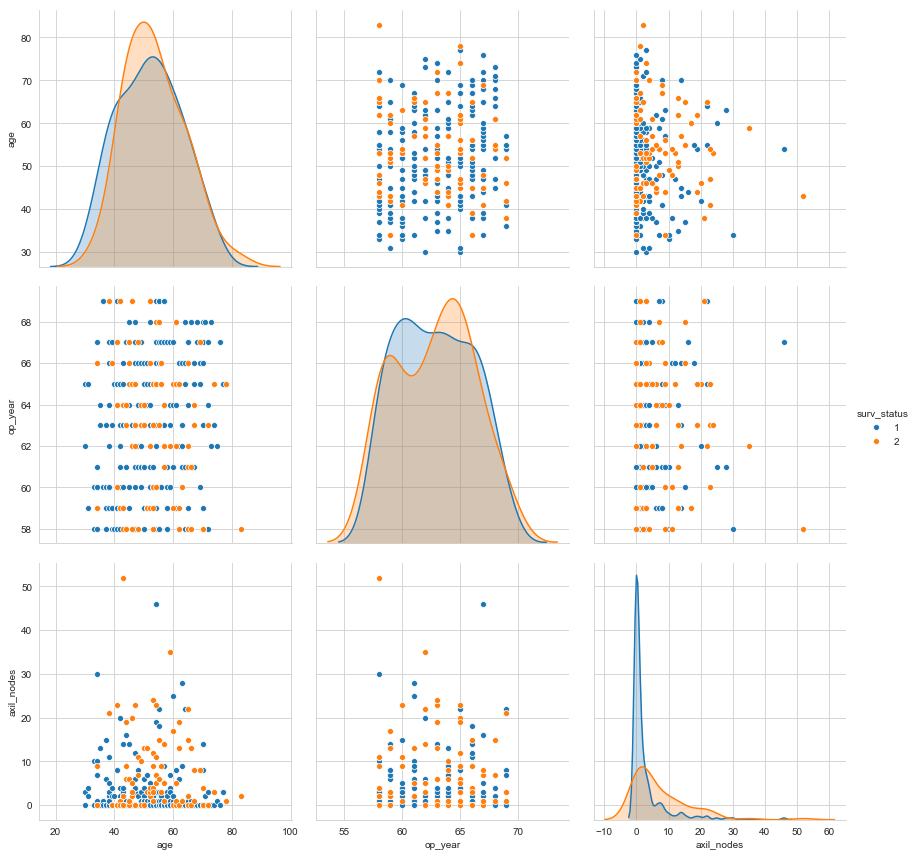

In [21]:
#Pair Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Haberman, hue='surv_status',size=4,vars=["age", "op_year",'axil_nodes']);
plt.show()

Remarks: 
    
Age -  We can see the peak of survived patients gaining lift over the patients who died for the age band less than 40 years 
old and after crossing the 40 age mark surviving peak is getting suppress as compare to those who didn't survive.

op_year -  Survived and died pateints share very similar distribution throughout except for year 1958-1963 where survival rate is much more & for year 1964-1968 where died percentage is much more.

axil_nodes - The distribution is extremely left skewed with very clear distinction for patients who survived and died. Less Axilary nodes (preferably 0) shows very high chance of pateints survival. Increase in detection of nodes lead to decrease in chance of patients survived.

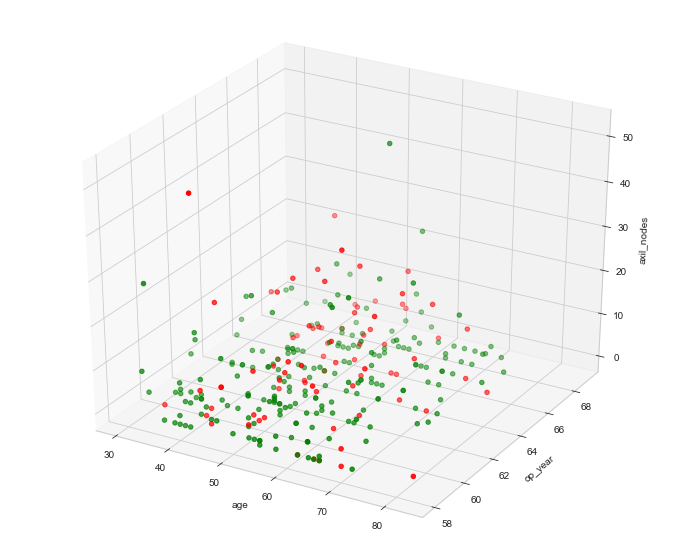

In [11]:
#3D Scatter Plot
import mpl_toolkits.mplot3d
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(Haberman['age'], Haberman['op_year'], Haberman['axil_nodes'], 
           c = Haberman['surv_status'].map(lambda x: {1:'green', 2:'red'}[x]), marker = 'o')
ax.set_xlabel('age')
ax.set_ylabel('op_year')
ax.set_zlabel('axil_nodes')
plt.show()

Remarks:

We can see most of the survival nodes towards the left down side of the plot which indicates 3 factors - 
1. 0 or less than 5 axil nodes.
2. Age less than 45.
3. Operation year before 1964.

,age,op_year,axil_nodes,surv_status
age,1.000000,0.092623,-0.066548,0.064351
op_year,0.092623,1.000000,-0.003277,-0.004076
axil_nodes,-0.066548,-0.003277,1.000000,0.286191
surv_status,0.064351,-0.004076,0.286191,1.000000


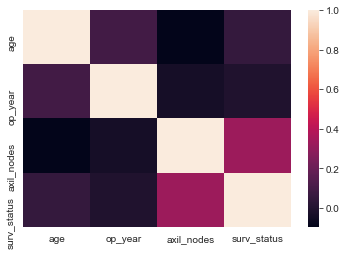

In [24]:
#Co-relation matrix
corr = Haberman.corr(method = 'spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Haberman.corr()

Remarks:
    
Looking at the correlation b/w dependent and independent variables & within independet variables.

Based on correlation matrix and plot we can see there is no strong correlation b/w independent variables.

Ordering correlation of surv_status with independent variables as follows:
    
Surv_stautus: axil_nodes > age > op_year

### Conclusion

1. Age less than 40 have highest chances of survival

2. Op_year for 1958-1963 have higher success rate as compare to post 1963

3. In terms of prediction strength for survival the order is as follows: Axil_nodes > Age > Op_year

4. Irrespective of age and op_year if the patient had 0 or less than 5 axil_nodes detected chances of survival is much higher.

5. If we look at the above 3d scatter plot then we can clearly see majority of survival pateints are distributed among x and y axis since z axis is plotted by axil_nodes & survival tends to be correlated with less axil nodes      


_______________________________________________________________________________________________________________________________________________________________________